# Analiza podatkov o receptih
V tej datoteki analiziramo podatke, pridobljenih s spletne strani Good Food. Stran ponuja širok nabor receptov za vse okuse in priložnosti, od preprostih vsakodnevnih obrokov do zapletenih gurmanskih specialitet. Vsak recept vsebuje informacije o zahtevnosti priprave, oceni in primernosti za različne diete.

V analizi bomo pregledali različne vidike receptov, kot so čas priprave, ocene, popularnost in različne prehranske preference. Cilj je ugotoviti, kateri recepti so najhitrejši, najbolj priljubljeni in kateri tip prehrane prejema najboljše ocene.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns
from collections import Counter

recepti = pd.read_csv('Projekt-UVP/Recepti.csv', index_col='ID')

Poglejmo, v kakšni obliki imamo naše podatke:

In [26]:
recepti.head(15)

,Ime,Ocena,Število ocen,Čas priprave,Level,Healthy,Vegetarian,Gluten free,Vegan
ID,,,,,,,,,
237863,All-the-trimmings traybake,4.70,18,1 hr 5 mins,Easy,False,False,False,False
238741,All-in–one chicken with wilted spinach,4.35,17,1 hr 20 mins,Easy,True,False,True,False
212163,All-in-one posh lamb balti,4.75,20,4 hrs 55 mins,Easy,False,False,False,False
269952,Suits-all Christmas cake,4.80,11,3 hrs 50 mins,Easy,False,False,False,False
839945,All in one apple pudding,5.00,1,1 hr,Easy,False,True,False,False
228151,All-in-one-baked mushrooms,4.35,17,30 mins,Easy,False,False,True,False
235503,All-in-one cabbage with beans & carrots,4.75,26,20 mins,Easy,False,False,False,False
225654,All-in-one chunky winter broth,3.75,30,30 mins,Easy,False,False,False,False
266556,"All-in-one chicken, squash & new potato casserole",4.65,25,45 mins,Easy,True,False,False,False


## Čas priprave receptov

### Pretvorba časa priprave v minute

Za lažjo analizo bomo čas priprave vseh receptov pretvorili v minute.


In [27]:
def pretvori_v_minute(recepti):
    cas_v_minutah = []
    for cas in recepti['Čas priprave']:
        minute = 0
        if isinstance(cas, str):
            cas = cas.lower().strip()
            if 'hr' in cas:
                ure = re.search(r'(\d+)\s*hr', cas)
                if ure:
                    minute += int(ure.group(1)) * 60
            if 'min' in cas:
                mins = re.search(r'(\d+)\s*min', cas)
                if mins:
                    minute += int(mins.group(1))
        cas_v_minutah.append(minute if minute > 0 else None)
    
    recepti['Čas v minutah'] = cas_v_minutah

pretvori_v_minute(recepti)

### Analiza časa priprave

In [28]:
recepti['Čas priprave'].value_counts()

Čas priprave
30 mins           289
40 mins           253
1 hr              231
50 mins           229
45 mins           229
                 ... 
9 hrs 20 mins       1
36 hrs 30 mins      1
120 hrs             1
48 mins             1
48 hrs              1
Name: count, Length: 153, dtype: int64

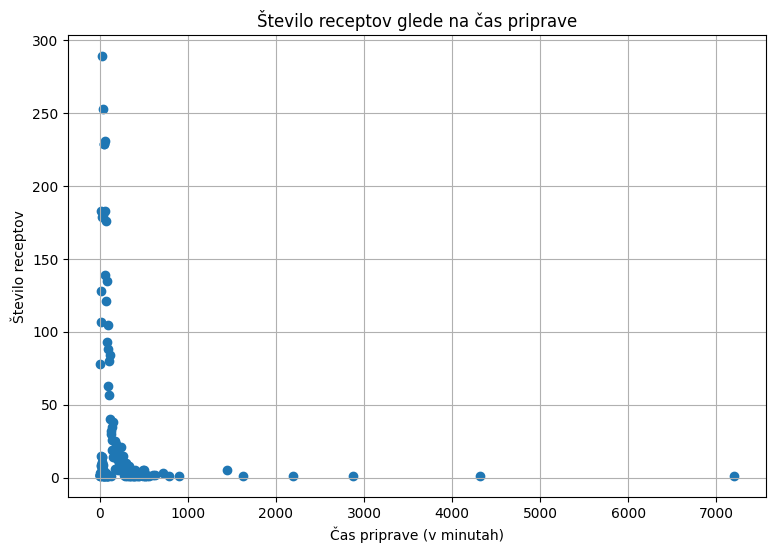

In [29]:
recepti_filtrirani = recepti.dropna(subset=['Čas v minutah']) #odstrani vse vrstice, kjer je vrednost v tem stolpcu prazna
stevilo_receptov_po_casu = recepti_filtrirani['Čas v minutah'].value_counts().sort_index()

plt.figure(figsize=(9, 6))
plt.scatter(stevilo_receptov_po_casu.index, stevilo_receptov_po_casu.values)
plt.title('Število receptov glede na čas priprave')
plt.xlabel('Čas priprave (v minutah)')
plt.ylabel('Število receptov')
plt.grid(True)
plt.show()


Ugotovili smo, da je najpogostejši čas priprave 30 min, večina receptov pa potrebuje za pripravo med 30 min do ene ure. Graf nam prikaže razporeditev števila receptov glede na čas priprave. Opazimo, da pride do nekaterih večjih odstopanj od povprečja, zato lahko poiščemo recepte, za katere potrebujemo najmanj in najdalj časa za pripravo.

In [30]:
def najhitrejsi_recepti(recepti):
    najhitrejsi_cas = recepti['Čas v minutah'].min()

    najhitrejsi_recepti = recepti[recepti['Čas v minutah'] == najhitrejsi_cas]
    
    print(f'Najhitrejši čas priprave: {najhitrejsi_cas:.0f} min')
    print('Recepti s tem časom priprave:\n')
    print(najhitrejsi_recepti[['Ime', 'Čas priprave', 'Ocena', 'Število ocen']].to_string(index=False))
    print('\n')

def najdaljsi_recepti(recepti):
    najdaljsi_cas = recepti['Čas v minutah'].max()
    
    najdaljsi_recepti = recepti[recepti['Čas v minutah'] == najdaljsi_cas]
    
    print(f'Najdaljši čas priprave: {najdaljsi_cas:.0f} min')
    print('Recepti s tem časom priprave:\n')
    print(najdaljsi_recepti[['Ime', 'Čas priprave', 'Ocena', 'Število ocen']].to_string(index=False))

najhitrejsi_recepti(recepti)
najdaljsi_recepti(recepti)

Najhitrejši čas priprave: 2 min
Recepti s tem časom priprave:

                          Ime Čas priprave  Ocena  Število ocen
Two-minute breakfast smoothie       2 mins    4.6           101


Najdaljši čas priprave: 7200 min
Recepti s tem časom priprave:

              Ime Čas priprave  Ocena  Število ocen
Sourdough starter      120 hrs   4.15            46


### Čas priprave glede na stopnjo zahtevnosti

Pregledali bomo, kakšen je povprečni čas priprave za različne stopnje težavnosti receptov.

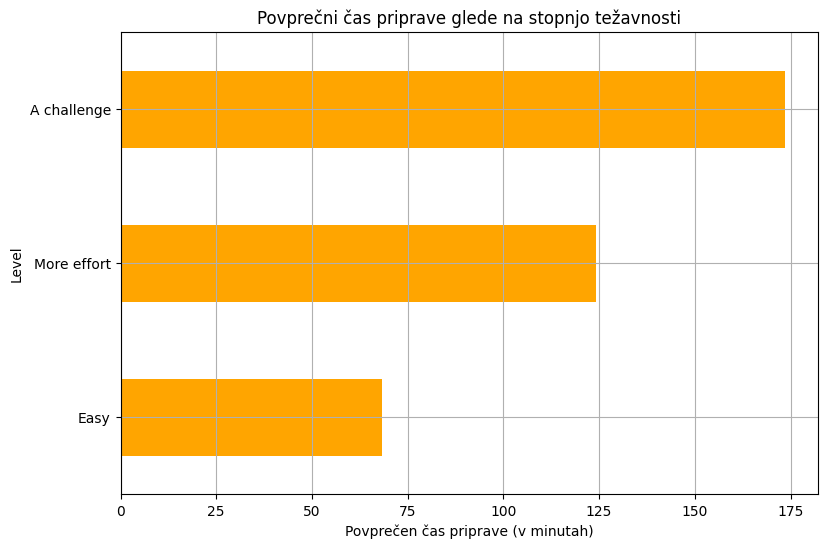

Najhitreje pripravljena vrsta jedi: Easy (v povprečju 68.21 minut)
Najdlje pripravljena vrsta jedi: A challenge (v povprečju 173.50 minut)


In [31]:
def tipi_jedi_po_casu_priprave(recepti):
    povprecni_casi = recepti.groupby('Level')['Čas v minutah'].mean().sort_values()

    plt.figure(figsize=(9, 6))
    povprecni_casi.plot(kind='barh', color='orange')
    plt.title('Povprečni čas priprave glede na stopnjo težavnosti')
    plt.xlabel('Povprečen čas priprave (v minutah)')
    plt.ylabel('Level')
    plt.grid(True)
    plt.show()

    najhitrejsi = povprecni_casi.idxmin()
    najpočasnejši = povprecni_casi.idxmax()
    
    print(f'Najhitreje pripravljena vrsta jedi: {najhitrejsi} (v povprečju {povprecni_casi.min():.2f} minut)')
    print(f'Najdlje pripravljena vrsta jedi: {najpočasnejši} (v povprečju {povprecni_casi.max():.2f} minut)')

tipi_jedi_po_casu_priprave(recepti)

## Ocenjenost receptov

Povprečna ocena receptov je 4.44.


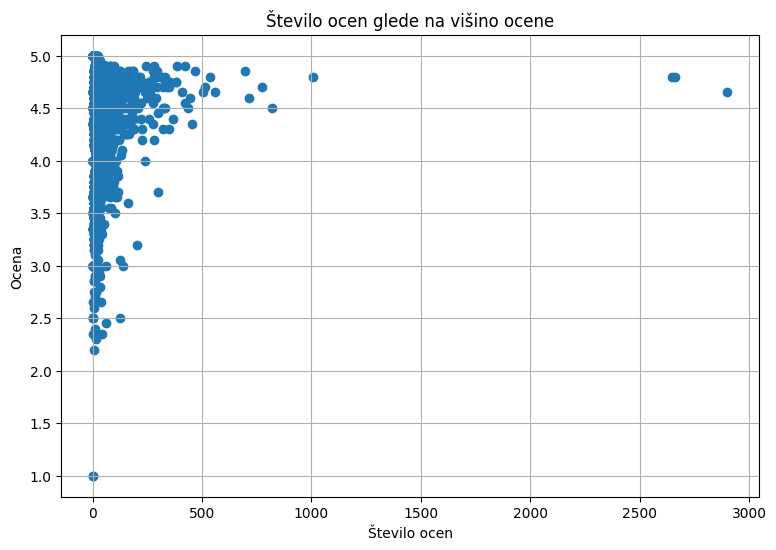

In [32]:
povprecje = round(float(recepti['Ocena'].mean()), 2)
print(f'Povprečna ocena receptov je {povprecje}.')

plt.figure(figsize=(9, 6))
plt.scatter(recepti['Število ocen'], recepti['Ocena'])
plt.title('Število ocen glede na višino ocene')
plt.xlabel('Število ocen')
plt.ylabel('Ocena')
plt.grid(True)
plt.show()

### Najbolje ocenjeni recepti
Izpisali bomo recepte, ki so dosegli oceno 5.0, in analizirali, kateri recepti imajo najboljšo kombinacijo ocene in števila ocen.

In [39]:
def ocena_pet(recepti):
    petka = []
    for _, recept in recepti.iterrows():
        ocena = recept['Ocena']
        if ocena == 5.0:
            petka.append(recept)

    print(f'Število najbolje ocenjenih receptov: {len(petka)}\n')
    print('Prvi trije najbolje ocenjeni recepti so:\n')
    for pet in petka[:3]:
        print(pet[['Ime', 'Ocena', 'Število ocen', 'Čas priprave']])
        print('\n')

ocena_pet(recepti)

Število najbolje ocenjenih receptov: 757

Prvi trije najbolje ocenjeni recepti so:

Ime             All in one apple pudding
Ocena                                5.0
Število ocen                           1
Čas priprave                        1 hr
Name: 839945, dtype: object


Ime             All-American T-bone
Ocena                           5.0
Število ocen                      2
Čas priprave                17 mins
Name: 216464, dtype: object


Ime             Chicken, leek & ham pie
Ocena                               5.0
Število ocen                         11
Čas priprave               1 hr 25 mins
Name: 844721, dtype: object




In [34]:
def kvaliteta_receptov(recepti, minimalna_ocena=4.5, minimalno_stevilo_ocen=20):
    
    kvalitetni_recepti = recepti[
        (recepti['Ocena'] >= minimalna_ocena) & 
        (recepti['Število ocen'] >= minimalno_stevilo_ocen)
        ]
    
    print(f'Število kvalitetnih receptov: {len(kvalitetni_recepti)}')
    print(kvalitetni_recepti[['Ime', 'Ocena', 'Število ocen', 'Čas priprave']].head(20).to_string(index=False))
    
kvaliteta_receptov(recepti)

Število kvalitetnih receptov: 745
                                                          Ime  Ocena  Število ocen  Čas priprave
                                   All-in-one posh lamb balti   4.75            20 4 hrs 55 mins
                      All-in-one cabbage with beans & carrots   4.75            26       20 mins
            All-in-one chicken, squash & new potato casserole   4.65            25       45 mins
                                             Pasta alla vodka   4.70            76       30 mins
                                   Next level steak & ale pie   4.85            60         4 hrs
                                          Gnocchi alla norma    4.55            28       35 mins
                                    Steak, ale & mushroom pie   4.80           166         4 hrs
Aubergine, tomato & Parmesan bake (Melanzane alla Parmigiana)   4.50           134          1 hr
                                 Foolproof slow roast chicken   4.60           249 2 hrs 35 m

### Popularni recepti
Popularnost receptov bomo določili glede na število ocen, ter izpisali top 15 najbolj ocenjenih receptov.


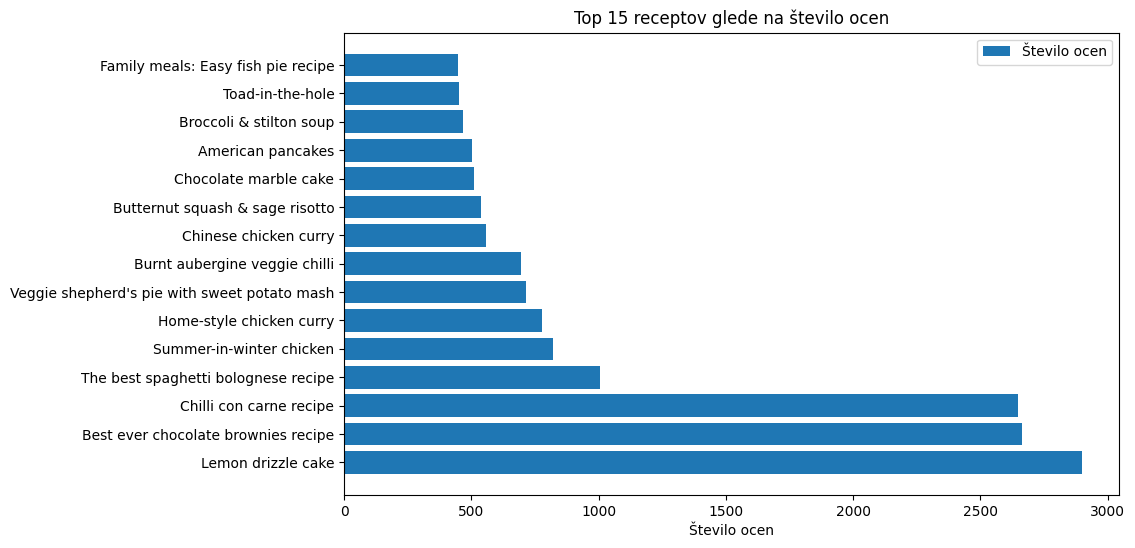

In [35]:
top_recepti = recepti.sort_values(by='Število ocen', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(top_recepti['Ime'], top_recepti['Število ocen'], label='Število ocen')

ax.set_xlabel('Število ocen')
ax.set_title('Top 15 receptov glede na število ocen')
ax.legend()

plt.show()

## Prehranske preference

<Axes: >

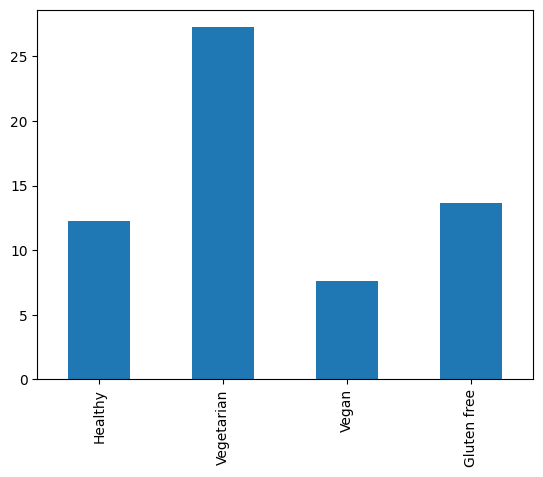

In [36]:
diet_prefs = recepti[['Healthy','Vegetarian', 'Vegan', 'Gluten free']].mean() * 100
diet_prefs.plot(kind='bar')

In [37]:
def analiza_zdravih_receptov(recepti):
    atributi = ['Healthy', 'Vegetarian', 'Gluten free', 'Vegan']
    analiza_rezultati = {}
    
    for atribut in atributi:
        for vrednost in [True, False]:
            skupina_receptov = recepti[recepti[atribut] == vrednost]
            povprecna_ocena = np.mean(skupina_receptov['Ocena'].apply(np.float64))
            analiza_rezultati[f'{atribut} = {vrednost}'] = povprecna_ocena
    
    return analiza_rezultati

zdravi_recepti_analiza = analiza_zdravih_receptov(recepti)
for atribut, povprecna_ocena in zdravi_recepti_analiza.items():
    print(f'Povprečna ocena za {atribut}: {povprecna_ocena:.2f}')

Povprečna ocena za Healthy = True: 4.32
Povprečna ocena za Healthy = False: 4.45
Povprečna ocena za Vegetarian = True: 4.39
Povprečna ocena za Vegetarian = False: 4.46
Povprečna ocena za Gluten free = True: 4.43
Povprečna ocena za Gluten free = False: 4.44
Povprečna ocena za Vegan = True: 4.34
Povprečna ocena za Vegan = False: 4.44


## Najpogostejše besede v imenih receptov
Izdelali bomo graf najpogostejših besed, ki se pojavljajo v imenih receptov.

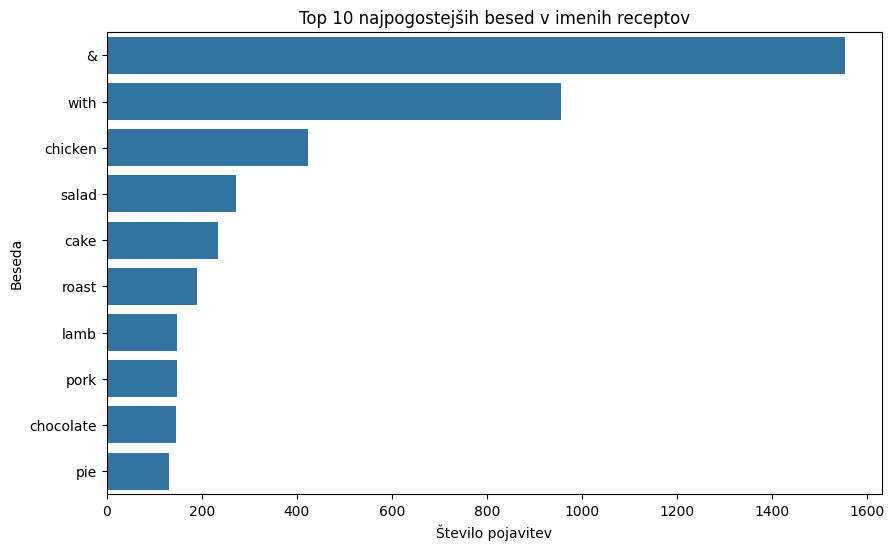

In [38]:
besede = ' '.join(recepti['Ime']).lower().split()
besede_stevilo = Counter(besede)
top_besede = dict(besede_stevilo.most_common(10)) # Seznam parov (beseda, število) pretvori v slovar

plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_besede.values()), y=list(top_besede.keys()))
plt.title('Top 10 najpogostejših besed v imenih receptov')
plt.xlabel('Število pojavitev')
plt.ylabel('Beseda')
plt.show()

## Zaključek

Analiza nam je pokazala raznolike vidike receptov z Good Food spletne strani. Ugotovili smo, kateri recepti so najbolj ocenjeni, najhitrejši za pripravo, in kateri tipi jedi zahtevajo več časa. Prav tako smo analizirali priljubljenost različnih prehranskih preferenc.
